In [21]:
# -*- coding: utf-8 -*-
"""
Created on Feb 7 2023

@author: mtaddei
"""

from matplotlib import *
import matplotlib.pyplot as plt
from numpy import load
from scipy.optimize import curve_fit
import pandas as pd
import os
import numpy as np

rcParams['font.family'] = 'sans-serif'  
rcParams['font.sans-serif'] = 'Arial'
#rcParams['font.sans-serif'] = 'comic sans ms'
rcParams['xtick.top'] = 'True'
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['ytick.right'] = 'True'
rcParams['xtick.major.pad']='4.5'
rcParams['ytick.major.pad']='3'
rcParams['xtick.minor.visible']= 'True'
rcParams['ytick.minor.visible']= 'True'


majorsize1 = 3
minorsize1 = 2
majorwidth1 = 1.5
minorwidth1 = 1

rcParams['ytick.major.size'] = majorsize1
rcParams['ytick.minor.size'] = minorsize1
rcParams['ytick.major.width'] = majorwidth1
rcParams['ytick.minor.width'] = minorwidth1
rcParams['xtick.major.size'] = majorsize1
rcParams['xtick.minor.size'] = minorsize1
rcParams['xtick.major.width'] = majorwidth1
rcParams['xtick.minor.width'] = minorwidth1

tickpad1 = 4
mylabelpad1 = 2 
labelfontsize1 = 8 
tickfontsize1 = 8
mylinewidth1 = 2
letfont1 = 12

textparams=dict(ha='right',va='center',xycoords='axes fraction')
vpos=.92


bluecolor = "#0165fc"

greencolor="#02ab2e"

redcolor='red'

stretched exponential fitting function on a single spot

In [34]:
from scipy.integrate import odeint
from scipy.optimize import differential_evolution
from scipy.special import gamma

def stretch_exp_fit(TRPL, t, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1.5)):

    def exp_stretch(t, tc, beta, a):
        return ((a * np.exp(-((1.0 / tc) * t) ** beta)))

    def avg_tau_from_exp_stretch(tc, beta):
        return (tc / beta) * gamma(1.0 / beta)

    def Diff_Ev_Fit_SE(TRPL):

        def residuals(params):#params are the parameters to be adjusted by differential evolution or leastsq, interp is the data to compare to the model.
            #Variable Rates
            tc = params[0]
            beta = params[1]
            a = params[2]


            PL_sim = exp_stretch(t,tc,beta,a)

            Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
            return Resid #returns the difference between the PL data and simulated data

        bounds = [Tc, Beta, A]

        result = differential_evolution(residuals, bounds)
        return result.x

    p = Diff_Ev_Fit_SE(TRPL)

    tc = p[0]
    beta = p[1]
    a = p[2]


    PL_fit = exp_stretch(t,tc,beta,a)

    avg_tau = avg_tau_from_exp_stretch(tc,beta)

    return tc, beta, a, avg_tau, PL_fit

In [22]:
plotthishistogram=(3,3)

In [23]:
intensitypath=r"C:\Users\Margherita\Downloads\br25_640nm_0.3MHz16751248161675127584_swabian_intensity_arr.npy"

timepath=r"C:\Users\Margherita\Downloads\br25_640nm_0.3MHz16751248161675127584_swabian_time_arr.npy"

In [24]:
histarr = load(intensitypath, allow_pickle=True)

timearr = load(timepath, allow_pickle=True)

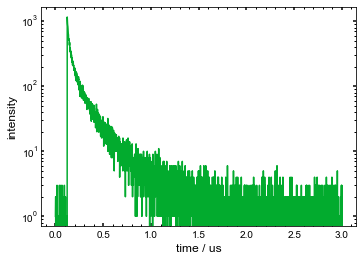

In [25]:
fig, ax0 = plt.subplots(1,1, figsize=(5, 3.5)) #, gridspec_kw={'width_ratios': [2,1]})
fig.subplots_adjust(top=0.985,
bottom=0.115,
left=0.1,
right=0.975,
hspace=0.305,
wspace=0.335)
ax0.plot(timearr[plotthishistogram]*1e-6, histarr[plotthishistogram], linewidth=1.5, color=greencolor)
ax0.set_ylabel('intensity', fontsize=12)
ax0.set_xlabel('time / us', fontsize=12)
#ax0.set_title('CsPbBr$_{3}$ QDs', fontsize=12)
#ax0.set_ylim(bottom=0)
#ax0.set_xlim(0,1e6)
ax0.set_yscale('log')


In [14]:
timearr[plotthishistogram]*1e-6

array([0.000e+00, 1.000e-03, 2.000e-03, ..., 2.997e+00, 2.998e+00,
       2.999e+00], dtype=float32)

In [27]:
time = timearr[plotthishistogram]*1e-6
data = histarr[plotthishistogram]
max_int = np.argmax(data)
    # base=np.mean(data[:max_int])  #### calculate the mean of the ref.
    # data = data - base
data = data[max_int:]
norm_data = []
for i in range(len(data)):
    norm_data.append((data[i]/np.max(data))) 
norm_data = np.asarray(norm_data)
time = np.asarray(time[max_int:])
time = time - time[0]

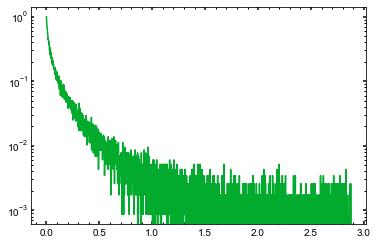

In [31]:
plt.plot(time, norm_data, linewidth=1.5, color=greencolor)
plt.yscale('log')

In [62]:
stretched_A1 = stretch_exp_fit(norm_data, time*1e-6, Tc = (0,4*1e-6), Beta = (0,1), A = (0,1))

C:\Users\Margherita\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Margherita\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in true_divide
C:\Users\Margherita\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Margherita\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Margherita\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


In [63]:
print("tau_c (ns) = "+str(stretched_A1[0]*1e9))
print("Beta = "+str(stretched_A1[1]))
print("avg. tau (ns) = "+str(stretched_A1[3]*1e9))

tau_c (ns) = 16.001855042233476
Beta = 0.4069798387621434
avg. tau (ns) = 50.7384797016832


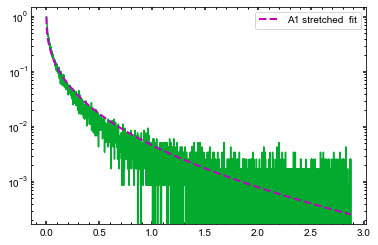

In [64]:
plt.plot(time, norm_data, linewidth=1.5, color=greencolor)
plt.plot(time, stretched_A1[4], 'm--', lw = 2, label="A1 stretched  fit")
plt.yscale('log')
plt.legend()


Going through the FLIM map and getting a map opf stretched lifetimes and beta values

In [65]:
# -*- coding: utf-8 -*-
"""
Created on Fri Oct  7 21:05:15 2022

@author: kguye
"""
###User Data Entry###
data_folder = r'C:\Users\Margherita\Downloads' #where is the data stored
save_folder = r'C:\Users\Margherita\Downloads' #where do you want files saved
save = True #do you want to save images (yes = True; no = False)
###No User Entry Below###

In [66]:
def stretch_exp(t, tau, a, b):
    y = a * np.exp(-(t/tau)**b)
    return y
def stretch_exp_fit(df, fun, p0):
    time = df.iloc[:,0]
    data = df.iloc[:,1]
    max_int = data.idxmax()
    # base=np.mean(data[:max_int])  #### calculate the mean of the ref.
    # data = data - base
    data = data[max_int:]
    norm_data = []
    for i in range(len(data)):
        norm_data.append((data.iloc[i]/max(data))) 
    norm_data = np.asarray(norm_data)
    time = np.asarray(time.iloc[max_int:])
    time = time - time[0]
    params, params_cov = curve_fit(fun, time, norm_data)
    # plt.plot(time, norm_data, label='Raw Data', c='black')
    # plt.plot(time, fun(time, params[0], params[1], params[2]), c='red', label="Fit")
    # plt.legend()
    # print('Tau: ' + str(params[0]))
    # print('a: ' + str(params[1]))
    # print('b: ' + str(params[2]))
    return time, norm_data, params

C:\Users\Margherita\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  



Mean:  0.5101549611102134

std:  0.01583464672062053

Mean:  23.575835035997475

std:  4.133081949822004

Mean:  0.474862033217145

std:  0.011017776133296868

Mean:  32.62778285575498

std:  3.451294360849994


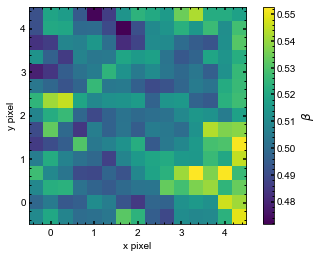

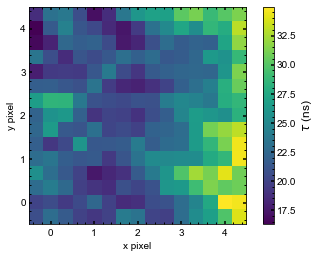

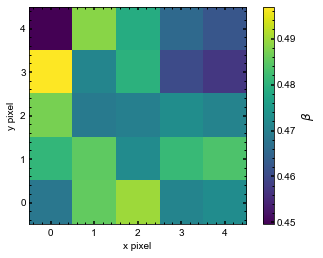

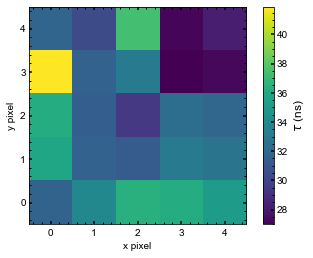

In [67]:
samples = np.array([])
for i in range(len(os.listdir(data_folder))):
    if'swabian_time_arr.npy' in os.listdir(data_folder)[i]:
        sample = os.listdir(data_folder)[i]
        sample = sample[:sample.index('_swabian')]
        samples = np.append(samples, sample)
idx = 0
for r in range(len(samples)):
    time = data_folder + '/' + samples[r] + '_swabian_time_arr.npy'
    intensity = data_folder + '/' + samples[r] + '_swabian_intensity_arr.npy'
    time = np.load(time, allow_pickle=True)
    intensity = np.load(intensity,allow_pickle=True)
        
    px,py = time.shape
    B_values = np.zeros((px,py))
    t_values = np.zeros((px,py))
    
    for i in range(px):
        for j in range(py):
            df = pd.DataFrame({'Time':time[i,j]/1000,'Intensity':(intensity[i,j])})
            time_stretch_1, norm_data_stretch_1, params = stretch_exp_fit(df, stretch_exp, [1, 0.2, 10])
            B_values[i,j] = params[2]
            t_values[i,j] = params[0]
    
    plt.figure(idx+1)
    plt.imshow(B_values,extent = [-0.5,4.5,-0.5,4.5],cmap = 'viridis')
    plt.xlabel('x pixel')
    plt.ylabel('y pixel')
    cbar = plt.colorbar()
    cbar.set_label(r'$\beta$',fontsize = 12)
    if save == True:
        plt.figure(idx+1)
        plt.savefig(save_folder+'/'+samples[r]+' beta values.png',dpi=300,bbox_inches = "tight")
        
    plt.figure(idx+2)
    plt.imshow(t_values,extent = [-0.5,4.5,-0.5,4.5], cmap = 'viridis')
    plt.xlabel('x pixel')
    plt.ylabel('y pixel')
    cbar = plt.colorbar()
    cbar.set_label(r'$\tau$'+' (ns)',fontsize=12)
    if save == True:
        plt.figure(idx+2)
        plt.savefig(save_folder+'/'+samples[r]+' tau values.png',dpi=300,bbox_inches = "tight")
    idx = idx + 100
    
    r1 = np.mean(B_values)
    print("\nMean: ", r1)
    r2 = np.std(B_values)
    print("\nstd: ", r2)
    r1 = np.mean(t_values)
    print("\nMean: ", r1)
    r2 = np.std(t_values)
    print("\nstd: ", r2)